In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from autograd import elementwise_grad as egrad

from rates_2D import ratesSS, PS

# Can train on V's with small enough eta

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])
W = np.reshape(params[:4], (2,2))

ideal_v, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])

In [27]:
def loss(params):
    vv, _ = ratesSS(params[0], params[1],params[2], params[3], params[4])
#     ll = np.mean((vv-ideal_v)**2)
    ll = np.mean((vv-ideal_v)**2) + np.abs(1000*np.sum(np.minimum(params, np.zeros(len(params)))))
    
    return ll

In [44]:
# d_loss = grad(loss)
# d_loss(params)

params = np.array([Jee, Jei , Jie, Jii, i2e+ 0.1])
eta = 0.0005
t_params = params

orig_loss = loss(params)
new_loss = orig_loss

t_loss = orig_loss
t = 0



In [46]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params)
    params = params - eta*d_params
    
    params = np.maximum(params, np.zeros(len(params)))
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

In [47]:
params

array([1.69781355, 1.52169304, 1.69996863, 0.50679227, 0.61180807])

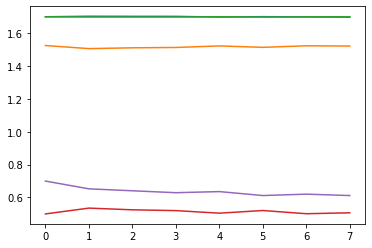

In [48]:
plt.plot(t_params)

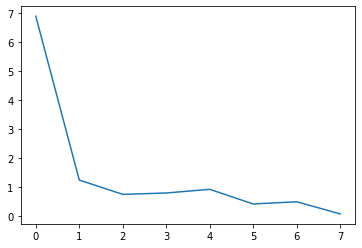

In [49]:
plt.plot(t_loss)


# Will autograd work on Spectra? Yes

In [4]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])

v1, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])
ideal_spect = np.real(PS(params[0], params[1],params[2], params[3], params[4], v1))

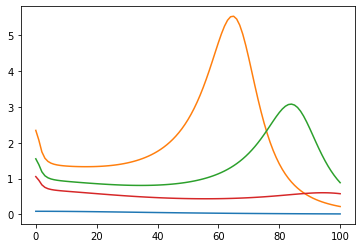

In [5]:
fs = np.arange(101)

plt.plot(fs, np.real(ideal_spect/np.mean(ideal_spect)))

In [6]:
def loss(params, v1):

    spect = PS(params[0], params[1],params[2], params[3], params[4], v1)
    spect = np.real(spect)
    
#     ideal_spect =ideal_spect/np.mean(ideal_spect)

    ll = np.mean((ideal_spect - spect)**2)
    
    return ll 

In [7]:
params = np.array([Jee, Jei +0.1 , Jie, Jii, i2e])
eta = 0.0005
t_params = params

orig_loss = loss(params, v1)
new_loss = orig_loss

t_loss = orig_loss
t = 0

print(orig_loss)

0.07322137943455963


In [8]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params, v1)
    params = params - eta*d_params
    
    params = np.maximum(params, np.zeros(len(params)))
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params, v1)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

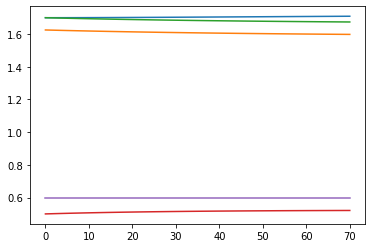

In [9]:
plt.plot(t_params)

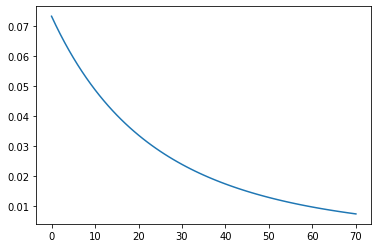

In [10]:
plt.plot(t_loss)

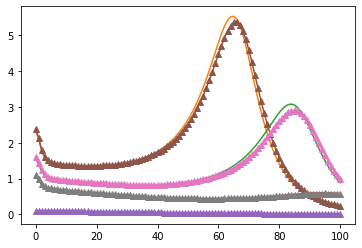

In [15]:
spect = np.real(PS(params[0], params[1],params[2], params[3], params[4], v1))

plt.plot(fs, ideal_spect, fs, spect, '-^')

In [24]:
params

array([1.70893116, 1.59791235, 1.6738682 , 0.52107614, 0.6       ])

# Will autograd work on the combination?

In [2]:
Jee = 1.7
Jei = 1.525
Jie = 1.7
Jii = 0.5
i2e = 0.6

params = np.array([Jee, Jei, Jie, Jii, i2e])

ideal_v, vv_t = ratesSS(params[0], params[1],params[2], params[3], params[4])
ideal_spect = np.real(PS(params[0], params[1],params[2], params[3], params[4], ideal_v))

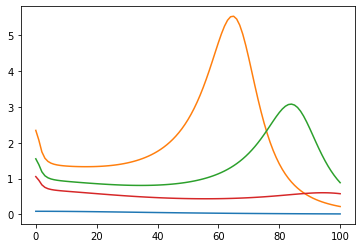

In [3]:
fs = np.arange(101)

plt.plot(fs, np.real(ideal_spect/np.mean(ideal_spect)))

In [4]:
def loss(params):
    
    v1, _ = ratesSS(params[0], params[1],params[2], params[3], params[4])
    spect = PS(params[0], params[1],params[2], params[3], params[4], v1)
    spect = np.real(spect)
    
#     ideal_spect =ideal_spect/np.mean(ideal_spect)

    ll = np.mean((ideal_spect - spect)**2)
    
    return ll 

In [16]:
params = np.array([Jee, Jei +0.1 , Jie, Jii, i2e])
eta = 0.0005
t_params = params

orig_loss = loss(params)
new_loss = orig_loss

t_loss = orig_loss
t = 0

print(orig_loss)

0.07591196020900431


In [17]:
while new_loss > 0.1*orig_loss:
    d_params = grad(loss)(params)
    params = params - eta*d_params
    
    t_params = np.vstack((t_params, params))
    
    new_loss = loss(params)
    t_loss = np.append(t_loss, new_loss)
    
    t += 1
    
    if t %100 == 0:
        print(new_loss)

In [19]:
d_params

array([nan, nan, nan, nan, nan])

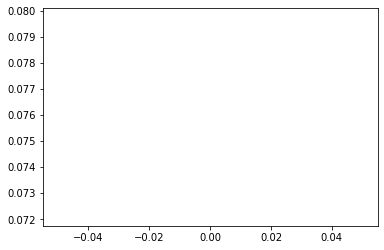

In [11]:
plt.plot(t_loss)